<a href="https://colab.research.google.com/github/MidoriTinto/Python_For_Data_Analysis/blob/main/Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

For this project we are going to use a movies database. 
The data will first be investigated and cleaned in an appropriate manner before looking into:


 

*   how many directors are there with the highest ranked movie

*   how many movies are there per genre 

*   what genre has the most movies made in the last century? maybe into a certain period e.g. 1980 - 1990


*   how many movies has a director worked on/directed? This might hint at experience




Which directors made the most movies in the 70s?


"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



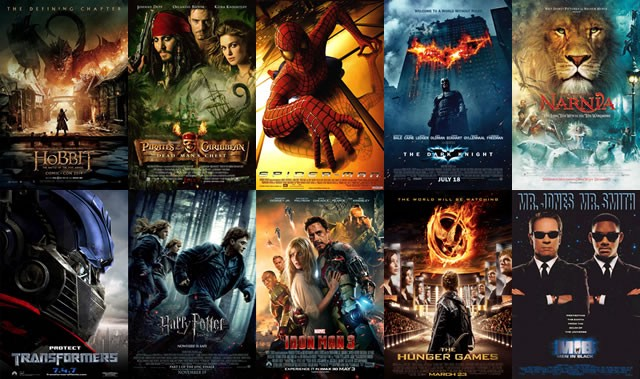

###1 - Inspect the dataset 
---

The data is first stored in a datframe called 'movies'. Since this is the original dataframe a copy is also made.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url="https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
movies=pd.read_csv(url)
movies

,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short
...,...,...,...,...,...,...,...
368889,368889,Yusuf,Ünal,Kalbim agliyor,1988,NaN,Drama
368890,368890,Ahmet,Ündag,Ve gnese kan siradi,1972,NaN,Adventure
368891,368891,Idil,Üner,"Liebenden vom Hotel von Osman, Die",2001,8.5,Short
368892,368892,Yüksel,Ünsal,Evvel zaman iinde,1951,NaN,Animation


In [ ]:
movies_copy=movies.copy()
movies

,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short
...,...,...,...,...,...,...,...
368889,368889,Yusuf,Ünal,Kalbim agliyor,1988,NaN,Drama
368890,368890,Ahmet,Ündag,Ve gnese kan siradi,1972,NaN,Adventure
368891,368891,Idil,Üner,"Liebenden vom Hotel von Osman, Die",2001,8.5,Short
368892,368892,Yüksel,Ünsal,Evvel zaman iinde,1951,NaN,Animation


**Summarising the dataframe**

In [ ]:

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


The dataframe shows null values in the column 'rank' which may be deleted before starting further analysis. 

**Spotting any inconsistencies in column names**


In [ ]:
movies.columns

Index(['Unnamed: 0', 'first_name', 'last_name', 'name', 'year', 'rank',
       'genre'],
      dtype='object')

In [ ]:
movies.describe()


,Unnamed: 0,year,rank
count,368894.000000,368894.000000,113376.000000
mean,184446.500000,1969.442222,5.995124
std,106490.669438,29.082051,1.540330
min,0.000000,1888.000000,1.000000
25%,92223.250000,1947.000000,5.100000
50%,184446.500000,1976.000000,6.200000
75%,276669.750000,1996.000000,7.100000
max,368893.000000,2007.000000,9.900000


### 2.  Cleaning the dataset 
---


**Dropping null values from the dataset** 

*Null values in a data set can lead to mistakes when analysing it , therefore, null values are dropped in the rank column. The clean dataframe is now called 'movies_drop'.*

In [ ]:
movies_drop=movies.dropna(subset=["rank"])
movies_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       113376 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB


**Creating a new column that stores the value of first_name and last_name together**

This step is not necessary, however, it makes easier further analysis where  first_name and last_name is used easier. The new column is called 'directors'

In [ ]:
 #adding a new column called directors that contains first and last name of each director
movies_drop['directors']= movies_drop['first_name']+' ' +movies_drop['last_name']
movies_drop


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,first_name,last_name,name,year,rank,genre,directors
77,77,Rostislav,Aalto,Cleaning Up!,2002,8.3,Documentary,Rostislav Aalto
78,78,Veikko,Aaltonen,Is meidn,1993,6.8,Drama,Veikko Aaltonen
79,79,Veikko,Aaltonen,Juoksuhaudantie,2004,6.3,Comedy,Veikko Aaltonen
80,80,Veikko,Aaltonen,Juoksuhaudantie,2004,6.3,Drama,Veikko Aaltonen
81,81,Veikko,Aaltonen,Maa,2001,6.0,Documentary,Veikko Aaltonen
...,...,...,...,...,...,...,...,...
368837,368837,Memduh,Ün,Garip,1986,7.9,Comedy,Memduh Ün
368838,368838,Memduh,Ün,Garip,1986,7.9,Drama,Memduh Ün
368861,368861,Memduh,Ün,Sezercik aslan parcasi,1972,6.0,Drama,Memduh Ün
368862,368862,Memduh,Ün,Sezercik aslan parcasi,1972,6.0,Romance,Memduh Ün


### 3. How many movies of each genre are there?
---

*To calculate how many movies per genre there are the clean dataframe was used. The pie chart below shows how the most movies made are in the genre Drama (24696) followed by Comedy (20633).*

              name
genre             
Action        5873
Adventure     3932
Animation     4727
Comedy       20633
Crime         4488
Documentary   4296
Drama        24696
Family        4845
Fantasy       2123
Film-Noir      415
Horror        4227
Music          908
Musical       2491
Mystery       2012
Romance       5476
Sci-Fi        2699
Short         9894
Thriller      5440
War           1837
Western       2364


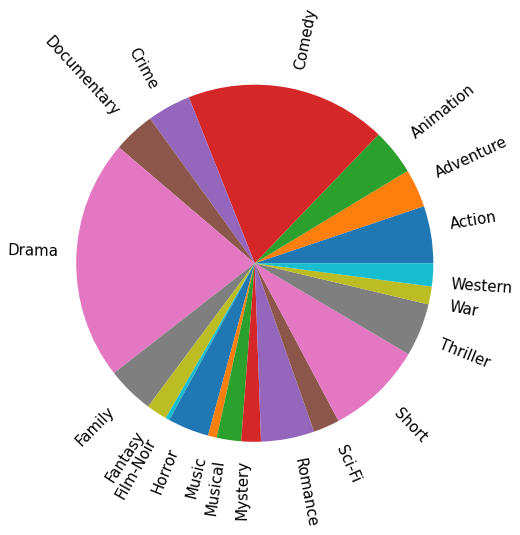

In [ ]:
import matplotlib.pyplot as plt

def genre():
  genre=movies_drop[['name', 'genre']].groupby('genre').count()
  print(genre)

  data = genre['name']
  #data
  labels=data.keys()
  plt.figure(figsize=(8,10))
  plt.pie(data, labels = labels, rotatelabels=180, textprops ={"fontsize":15})

  plt.show()

genre()

### 4. Which director has the highest ranked movies?
---

*To answer this question the list of all ranks present in column 'rank' were looked at first. It was found that the highest rank was 9.9.*

In [ ]:
rank=movies_copy['rank'].unique()
rank

array([nan, 8.3, 6.8, 6.3, 6. , 4.3, 6.9, 6.7, 4.4, 3.3, 4.8, 4.5, 5. ,
       4.2, 4.1, 3.5, 7.5, 5.6, 7.8, 7.3, 2.7, 3.9, 7.1, 7.4, 5.9, 8.5,
       5.7, 3.8, 6.4, 8.1, 7. , 8.6, 7.2, 6.1, 4.6, 6.5, 5.2, 5.8, 3.2,
       2.4, 2.5, 5.1, 6.6, 4.7, 7.7, 6.2, 5.5, 2.9, 9.2, 8.2, 8.9, 5.4,
       2.2, 7.6, 5.3, 4.9, 3.4, 2. , 1.9, 2.6, 1.7, 1.5, 3.1, 2.1, 1. ,
       1.6, 3.6, 1.8, 9. , 4. , 3. , 8. , 9.3, 9.1, 1.4, 7.9, 2.8, 8.7,
       9.4, 9.8, 9.7, 8.4, 8.8, 3.7, 1.1, 2.3, 9.9, 1.3, 9.6, 9.5, 1.2])

Using 9.9 as the highest rank, Carole Roussopoulos was the only director found to has the most movies (n=5) ranking at 9.9.

In [ ]:
def count_movies():
  #finding all directors with a rank over 9
 director=movies_drop[movies_drop['rank'] == 9.9].groupby('directors')['rank'].count()
 
 return director

count_movies()

directors
Abel Gance              1
Andrew Cappelletti      2
András Salamon          1
Arünas Zebriünas        1
Ben Holmes              2
Benjamin Christensen    1
Carole Roussopoulos     5
Debs Tarrier            2
Fedor Hanzekovic        1
Georgi Daneliya         1
Gregg Zehentner         3
Ioana Wieder            2
Ishmael Bernal          1
Isidor Annensky         1
Ivanka Grybcheva        1
Jim Jarmusch            1
Jirí (I) Trnka          1
John Cassavetes         2
Jonathan Demme          2
Julio (I) Bracho        3
Kirsten Tretbar         1
Marcell Jankovics       1
Matthew Crandall        2
Satyen Bose             3
Scott Barkan            3
See-Yuen Ng             1
Sergei M. Eisenstein    1
Sergiu Nicolaescu       2
Vsevolod Pudovkin       1
William T. Hurtz        2
Zack Resnicoff          4
Name: rank, dtype: int64

### How many movies have ranks of over 9?
---


*A movie can appear more than twice in the rank column if the same movie has been classified into different genre(e.g\\\\ Short and Animation as seen in the image below for 'Mona Lisa descending a Staircase'). Therefore, for this exercise, duplicates in this dataframe were dropped first. By doing so 806 movies were found to rank above 9 which makes only 1.4% of the whole dataframe.* 

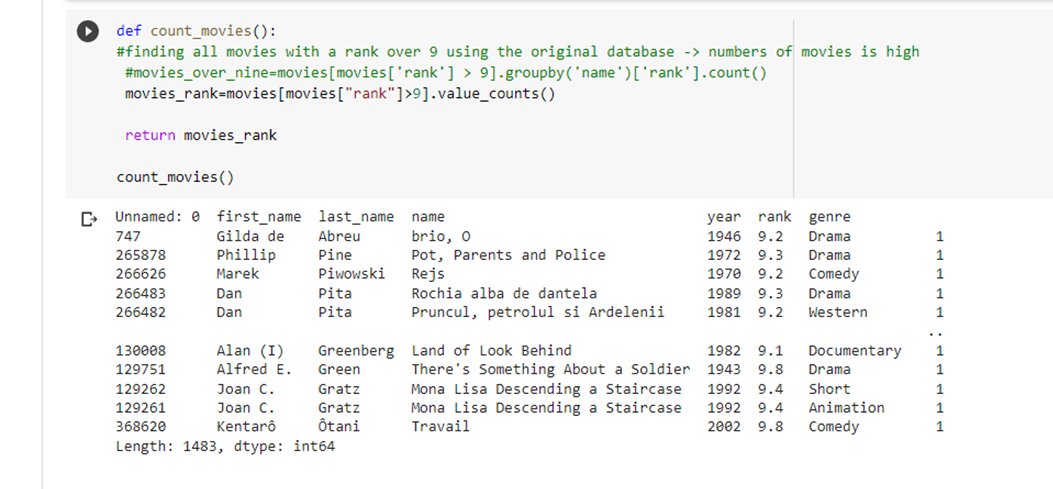

In [ ]:
def count_movies():
#using a dataframe in which null values and duplicates have been dropped
 movies_drop_doubles=movies_drop.drop_duplicates(['name'])#there are now only 55954 movies after duplicates removed

#finding all movies with a rank over 9
 movies_over_nine=movies_drop_doubles[movies_drop_doubles['rank'] > 9].groupby('name')['rank'].count()#806 movies
 percentage_movies_over_9= len(movies_over_nine)*100/len(movies_drop_doubles)

 #return  movies_drop_doubles.info() 
 print(movies_drop_doubles.info(), "\n There are in total", len(movies_over_nine), " movies with a rank > 9. This only represents ", round(percentage_movies_over_9, 1), "% of the whole dataframe.")

count_movies()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 77 to 368891
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  55954 non-null  int64  
 1   first_name  55954 non-null  object 
 2   last_name   55954 non-null  object 
 3   name        55954 non-null  object 
 4   year        55954 non-null  int64  
 5   rank        55954 non-null  float64
 6   genre       55954 non-null  object 
 7   directors   55954 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.8+ MB
None 
 There are in total 806  movies with a rank > 9. This only represents  1.4 % of the whole dataframe.


### Plot a bar chart of mean rank and genre
---

*The bar chart belows shows the average rank for a specific genre. **Documentary** and **Film Noir** seemed to rank above all other genres.*

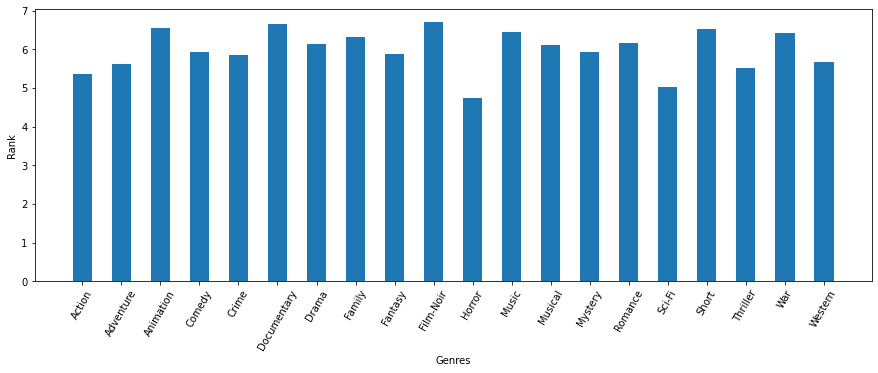

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

url="https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
movies=pd.read_csv(url)
movies



ranking=movies_drop.groupby(['genre'])['rank'].mean()
labels=ranking.keys()
plt.figure(figsize=(15,5))
plt.bar(labels,ranking, width=0.5, align='center')
plt.xlabel('Genres')
plt.xticks(rotation=60)
plt.ylabel('Rank')
#barchart=ranking.plot(x='genre', y=ranking, kind="bar")
plt.show()







### Plot a graph showing the mean Rank for each year 

*The bar chart below shows that the period ca. 1918 - 1928 had the higher ranked movies compared to all the other years. In cinema history the 1920s is considered the greatest decade in movies. At this point in time, 'the cinematic medium was old enough to be popular, and to some extent ingrained in society, but young enough to still be an experimental art form'. Filmmakers felt they had freedom to experiment in their productions knowing people would still pay to go see them which in turned might have had an effect on how good movies were ranked. Thus, it may not come as a surprise that few of movies produced in this decade are up until today considered greatest films of all time (e.g Man with a Movie Camera, The Passion of Joan D'Arc). In addition to that, the 1920s introduced the 'talkies' (synchronisation of picture and sound on the big screen) which certainly elevated the cinema experience which may have resulted in higher rankings  *(https://www.bbc.com/culture/article/20200601-the-greatest-decade-in-cinema-history#:~:text=The%201920s%20saw%2C%20among%20many,Charlie%20Chaplin%20and%20Buster%20Keaton%20%E2%80%93). 

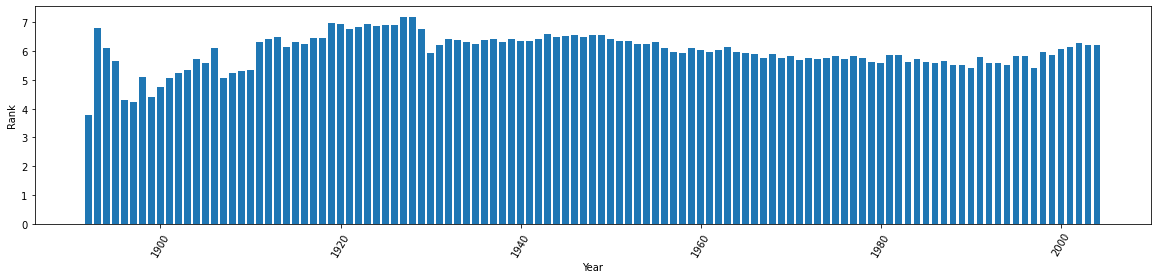

In [ ]:
ranking=movies_drop.groupby(['year'])['rank'].mean()
labels=ranking.keys()
plt.figure(figsize=(20,4))
plt.bar(labels,ranking, width=0.7, align='center')
plt.xlabel('Year')
plt.xticks(rotation=60)
plt.ylabel('Rank')
plt.show()

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  How many movies have been released per year?
2.  How many movies has a director worked on/directed? This might hint at experience
3.  Which directors made the most movies in the 70s - as per this dataframe?


### Complete the tasks you have set out in the exercise above. 
---


### How many movies have been released per year?

Our dataframe comprises over a century of movies. In that time frame more movies have been released towards the end (between 1993 to 2002) than it has been at the beginning (1893). One reason for this may be film technology. 

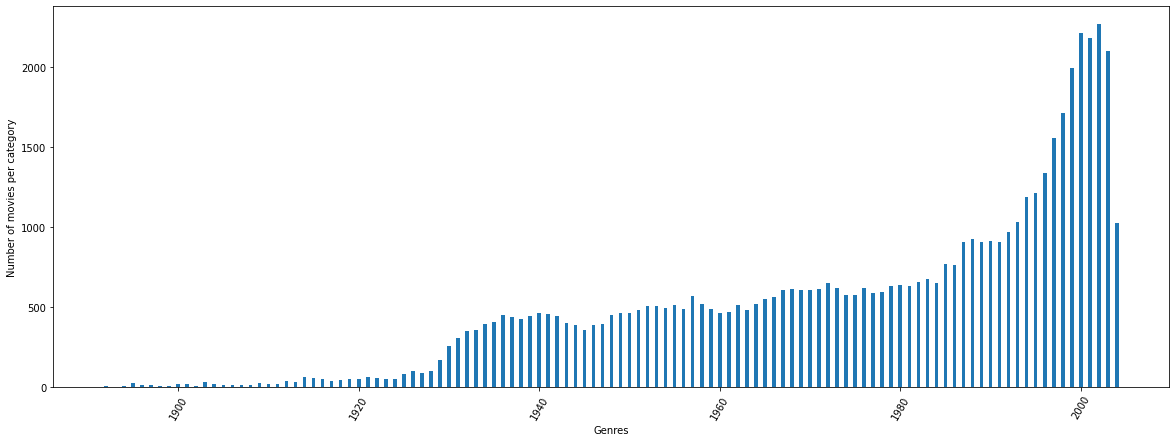

2002    2265
2000    2212
2001    2183
2003    2100
1999    1992
        ... 
1899       7
1902       5
1892       4
1894       3
1893       1
Name: year, Length: 113, dtype: int64

In [ ]:
def genre_most_mov():
  movies_drop_doubles=movies_drop.drop_duplicates(['name'])#dropping all duplicates movies in column 'name'
  #return movies_drop_doubles
  movies_per_year=movies_drop_doubles['year'].value_counts()

  labels=movies_per_year.keys()
  plt.figure(figsize=(20,7))
  plt.bar(labels,movies_per_year, width=0.4, align='center')
  plt.xlabel('Genres')
  plt.xticks(rotation=60)
  plt.ylabel('Number of movies per category')
  plt.show()
  return movies_per_year
genre_most_mov()

### How many movies has a director worked on (directed)?




Here, the dataframe without duplicates and null values is used again. Directors were grouped and counted depending on the number of movies they have worked on e.g 11000 directors have directed only one movie, 5000 directors have directed two movies and so on.



It was found that out of 19676  directors (see number of rows below the bar chart) 11829 directors (60.12%) worked on/directed only one movie.  Directors who have directed 10  movies and more are very few. Because of the amount of movies these directors have worked on they might be considered experienced.

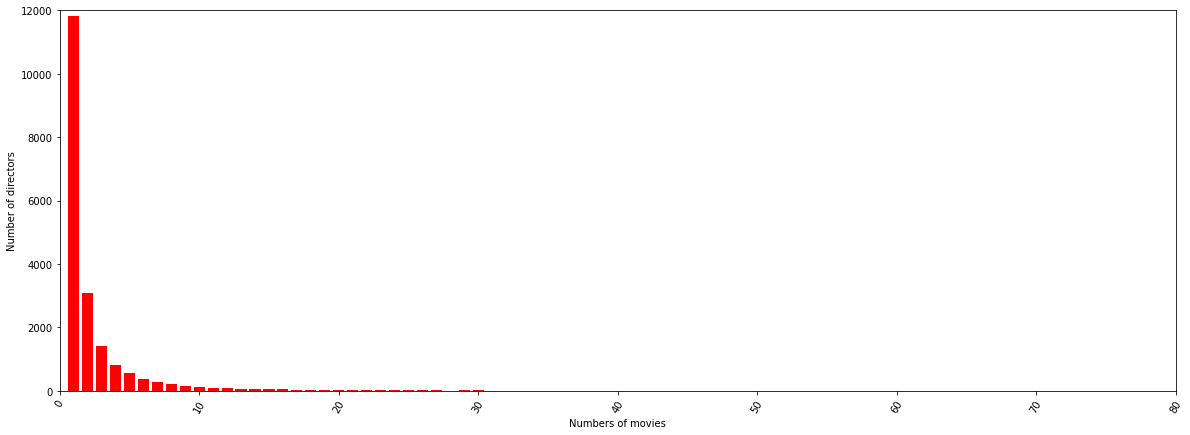

(1      11829
 2       3080
 3       1406
 4        824
 5        555
        ...  
 250        1
 241        1
 47         1
 51         1
 67         1
 Name: name, Length: 78, dtype: int64,                          name
 directors                    
 'Philthy' Phil Phillips     1
 A. (I) Abramov              1
 A. Bhimsingh                3
 A. Charles Addessi          1
 A. Dean Bell                2
 ...                       ...
 Ömer Ali Kazma              1
 Ömer Kavur                  5
 Øyvind Sandberg             1
 Øyvind Vennerød             5
 Þráinn Bertelsson           3
 
 [19676 rows x 1 columns])

In [ ]:
def genre_most_mov():
 
  #dropping all duplicates movies in column 'name'
  movies_drop_doubles=movies_drop.drop_duplicates(['name'])
  #return movies_drop_doubles

  #the number of movies a director has directed
  movie_counts=movies_drop_doubles.groupby(['directors'])['name'].count()
  #return x

  #creating a dataframe that contains the name of each director and their counts
  directors_movies=pd.DataFrame(movie_counts)
  #return new_df

  #counting now how many directors are there with, for instance, one movie -> 11829 directors have worked on one movie
  total_count_directors=directors_movies['name'].value_counts() 
  
  

  labels=total_count_directors.keys()
  plt.figure(figsize=(20,7))
  plt.bar(labels,total_count_directors, align='center', color='red')
  plt.xlabel('Numbers of movies')
  plt.xticks(rotation=60)
  plt.ylabel('Number of directors')
  plt.xlim(0,80 ) 
  plt.ylim(0, 12000)
  plt.show()
  return(total_count_directors, directors_movies)

genre_most_mov()

### Which director(s) made the most movies in the 70s?


*The aim of this exercise was to find out the director(s) who made highest number of movies during the 70s. 
After filtering counting how many movies directors had directed movies between 1969 and 1979 it was found that the max number of movies were 21. Using pd.set_option("display.max_rows") chinese director Cheh Chang was found to be the only director who had made 21 movies during this period.*

*Using pd.set_option("display.max_rows") chinese director **Cheh Chang** was found to be the director who had made 21 movies in the 70s. Most of his films are wuxia and kung fu films (action films filled with violence)*

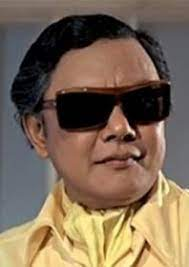

In [ ]:
def genre_most_mov():
 
  #dropping all duplicates based on column 'name'
  movies_drop_doubles=movies_drop.drop_duplicates(['name'])
  #return movies_drop_doubles

  #the times a director has directed a movie between 1969 and 
  times_directed=movies_drop_doubles[(movies_drop_doubles['year']>1969) & (movies_drop_doubles['year']<1979)].groupby(['directors'])['name'].count()#the times a director has d



  #by printing times_directed.max() that the maximum number of movies a director had directed in the 70s was 21 
  #to find out who that was/they were, the whole dataframe was displayed -> Cheh Chang is the director with 21 movies

  pd.set_option("display.max_rows", None)
  return times_directed

 
genre_most_mov()

directors
A. Bhimsingh                     2
Abbas Kiarostami                 2
Abel Gance                       1
Adolf Winkelmann                 1
Adolfo Aristarain                1
Adrian Hoven                     2
Adrian Maben                     1
Adriano Bolzoni                  1
Adriano Celentano                1
Adriano Stuart                   1
Agnès Varda                      2
Akira Daikuhara                  1
Akira Kurosawa                   2
Al Adamson                      18
Al Waxman                        1
Alain (I) Corneau                2
Alain Jessua                     1
Alain Resnais                    2
Alain Robbe-Grillet              3
Alain Tanner                     3
Alan (I) Cooke                   1
Alan (I) Gibson                  5
Alan (I) Parker                  3
Alan Abel                        1
Alan Arkin                       2
Alan Birkinshaw                  1
Alan Bridges                     3
Alan Gadney                      1
Alan J. Le

# Conclusion
----
*The amount  of movies released per year  since the late 19th century have dramatically increased partly due to evolution of filmmaking. Looking at movie ranking over the years showed the 1920s as the decade in which movies ranked higher compared to other years. A combination of different factors such as the introduction of one of the most significant technologies since the projection of moving images, the 'talkies', as well as the willingness of viewers to go see experimental movies could have led to this. 
Counting how many movies a director has made showed the vast amount of directors with only one movie to their name while those directors with 10 movies or more were far and few. Experience comes with practice and so the directors with many movies may be seen as more experienced in successfully direciting movies that are released. When it comes to genres it seems directors like to make movies that fit into drama and/or comedy since these were found to be the genres in which most movies were categorised. This is somewhat in contrast with the genres that ranked best over the years which where documentary and film noir.*



# Reflection
----

## What skills have you demonstrated in completing this notebook?

*Your answer:*
Overall, I enjoyed working with this data set. I  have been abele to investigate, clean, describe and interrogate data. 




## What caused you the most difficulty?

Your answer:
Getting my graphs to look ok (e.g pie chart)
Making sure I was using the correct dataframes. One of my dataframes had only null values dropped, the other had null values and duplicates dropped. Duplicates were important when counting movies in a genre since a movie can have many genres. But if counting e.g. movies in a rank a movie can only have one rank so here the df without null values and without duplicates was used.